In [1]:
# General exploration of VOLCAT retrievals for Bezymianny eruption in October 2020.

In [2]:
%load_ext autoreload

In [3]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
from monetio.models import hysplit
from utilvolc import volcMER
from utilvolc import volcat

/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


In [5]:
%autoreload
vidA = 'v300250'
d1 = datetime.datetime(2020,10,21,22)
d2 = datetime.datetime(2020,10,21,23)
tdir = '/pub/ECMWF/JPSS/VOLCAT/Bezymianny/Ash/pc_corrected_4/'
#dfnames = volcat.get_volcat_name_df(tdir,daterange=[d1,d2],vid=vidA,include_last=True)

In [6]:
# Example of information in the VOLCAT filename.
%autoreload
tdir = '../data/volcat/'
vidA = 'v300250'
import glob
fnames = glob.glob(tdir +'VOLCAT*')
fnames
vn = volcat.VolcatName(fnames[0])
vn.vhash

{'algorithm name': 'VOLCAT',
 'satellite platform': 'HIMAWARI-8',
 'event scanning strategy': 'FLDK',
 'event date': 's2020295',
 'event time': '210000',
 'volcano id': 'v300250',
 'description': 'VCB',
 'WMO satellite id': 'w167',
 'image scanning strategy': 'FLDK',
 'image date': 'b2020295',
 'image time': '204000',
 'feature id': 'g001',
 'idate': datetime.datetime(2020, 10, 21, 20, 40),
 'edate': datetime.datetime(2020, 10, 21, 21, 0),
 'filename': '../data/volcat/VOLCAT_HIMAWARI-8_FLDK_s2020295_210000_v300250_VCB_w167_FLDK_b2020295_204000_g001_pc_rg.nc'}

In [7]:
#%autoreload
# CODE to write parallax corrected files.
#tdir = '../data/volcat/'
#vidA = 'v300250'
#d1 = datetime.datetime(2020,10,21,20,0)
#d2 = datetime.datetime(2020,10,22,20,0)
# this gets the original array.
#odas = volcat.get_volcat_list(tdir,daterange=[d1,d2],vid=vidA,correct_parallax=False,mask_and_scale=False)
#volcat.write_parallax_corrected_files(tdir,wdir,vid=vidA,verbose=True,daterange=[d1,d2])

In [8]:
%autoreload
# load volcat files. Parallax corrected but not regridded.
tdir = '../data/volcat_pc/'
bezyloc = [160.587,55.978]
d1 = datetime.datetime(2020,10,21,20,0)
d2 = datetime.datetime(2020,10,22,20,0)
tlist = volcat.find_volcat(tdir,daterange=None,vid=vidA,return_val=1,verbose=True)
das = volcat.get_volcat_list(tdir,daterange=[d1,d2],vid=vidA)

Not VOLCAT filename BezyVolcat_0p1.nc


<xarray.DataArray 'ash_cloud_height' ()>
array(9.30999947)


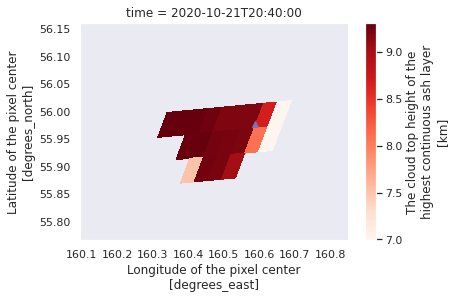

<xarray.DataArray 'ash_mass_loading' ()>
array(33.18503571)


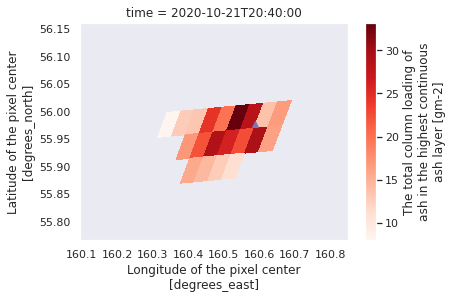

In [9]:
# plot ash mass loading and ash height.
iii=0  # index of time period to plot.
#----------------------------------------
vht  = volcat.get_height(das[iii],clip=True)
sns.set()
vht.isel(time=0).plot.pcolormesh(x='longitude',y='latitude',cmap="Reds")
plt.plot(bezyloc[0],bezyloc[1],'m^')
plt.savefig('bezy_volcat_2040_ht.png')
print(np.max(vht))
plt.show()

vht  = volcat.get_mass(das[iii],clip=True)
sns.set()
vht.isel(time=0).plot.pcolormesh(x='longitude',y='latitude',cmap='Reds')
plt.plot(bezyloc[0],bezyloc[1],'m^')
plt.savefig('bezy_volcat_2040_ht.png')
print(np.max(vht))
plt.show()

#vht.isel(time=0).plot.pcolormesh(1

HT 4 km : MER 2.25e+02 kg/s
HT 5 km : MER 3.18e+03 kg/s
HT 6 km : MER 1.58e+04 kg/s
HT 7 km : MER 5.02e+04 kg/s
HT 8 km : MER 1.24e+05 kg/s
HT 9 km : MER 2.59e+05 kg/s
HT 10 km : MER 4.85e+05 kg/s
HT 11 km : MER 8.37e+05 kg/s
HT 12 km : MER 1.36e+06 kg/s
HT 13 km : MER 2.09e+06 kg/s
HT 14 km : MER 3.09e+06 kg/s
HT 15 km : MER 4.41e+06 kg/s
HT 16 km : MER 6.13e+06 kg/s


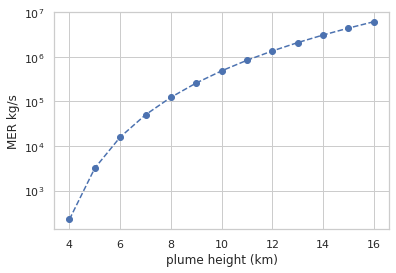

In [10]:
# how various plume heights correspond to MER according to Mastin equation.
sns.set()
sns.set_style('whitegrid')
vent = 2.88 #km  (9,455 ft)
htlist = [4,5,6,7,8,9,10,11,12,13,14,15,16]
merlist = []
for ht in htlist:
    ht2 = ht - vent
    MER = volcMER.mastinMER(ht2)
    print('HT {} km : MER {:0.2e} kg/s'.format(ht, MER))
    merlist.append(MER)
    
plt.plot(htlist, merlist, '--bo')
ax = plt.gca()
ax.set_yscale('log')
ax.set_xlabel('plume height (km)')
ax.set_ylabel('MER kg/s')
plt.savefig('Mastin_mer_bezy.png')

In [19]:
%autoreload
from utilvolc import volcat_plots as vp
volcplot = vp.VolcatPlots(das)
volcplot.make_arrays()

here
['2020-10-22T19:50:00.000000000']
['2020-10-21T20:40:00.000000000']


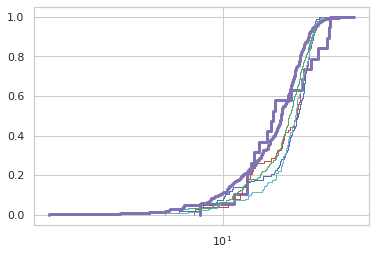

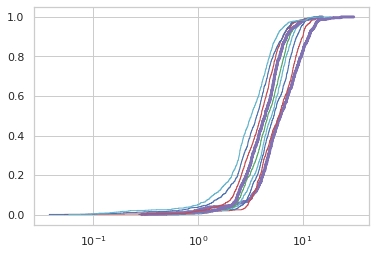

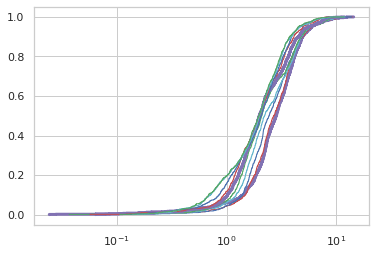

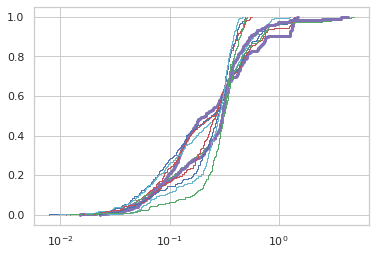

In [35]:
%autoreload
ax = volcplot.volcat_cdf_plot(nums=[0,6])
ax.set_xscale('log')
plt.show()
ax = volcplot.volcat_cdf_plot(nums=[11,20])
ax.set_xscale('log')
plt.show()
ax = volcplot.volcat_cdf_plot(nums=[21,31])
ax.set_xscale('log')
plt.show()
ax = volcplot.volcat_cdf_plot(nums=[101,111])
ax.set_xscale('log')
plt.show()

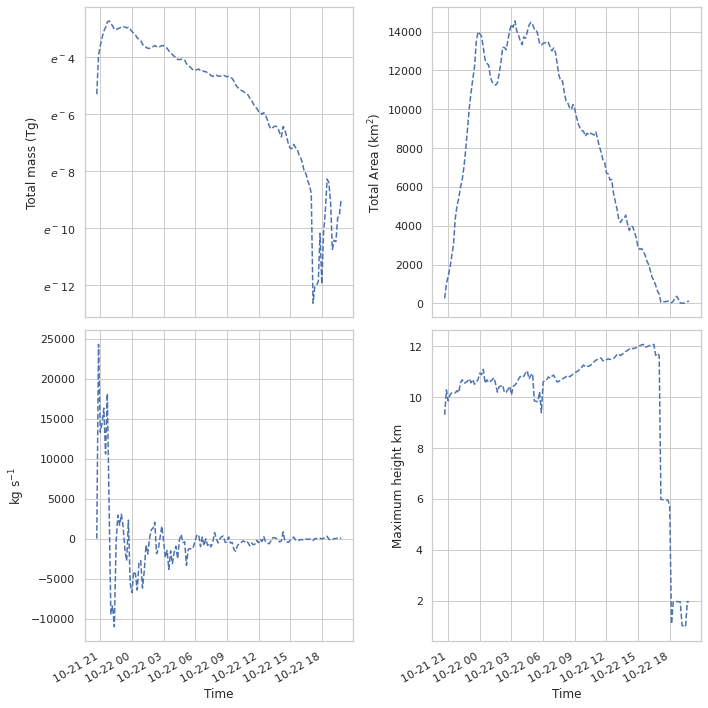

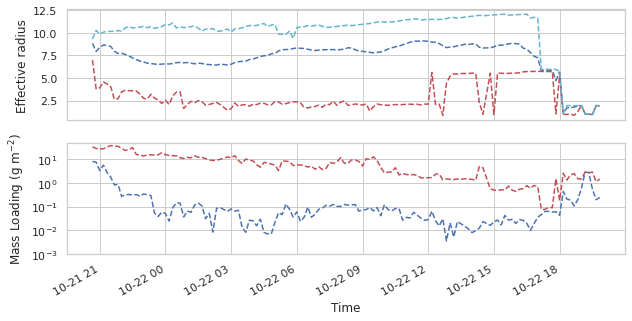

In [12]:
%autoreload
#volcplot.set_plot_settings()
fig1 = volcplot.plot_multiA(fignum=1,smooth=0.08)
fig2 = volcplot.plot_multiB(fignum=2)
fig1.savefig('Bezy_volcat_plotA.png')
fig2.savefig('Bezy_volcat_plotB.png')

(737719.8333333334, 737720.0138888889)

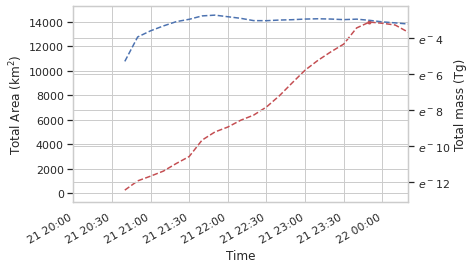

In [13]:
%autoreload
# Looking at Total Area and Total mass on same plot
fig = plt.figure(3)
d1 = datetime.datetime(2020,10,21,20,0)
d2 = datetime.datetime(2020,10,22,0,20)
ax = fig.add_subplot(1,1,1)
ax2 = ax.twinx()
volcplot.sub_plot_area(ax,clr=0)
volcplot.sub_plot_mass(ax2)
#ax.set_xlim(datetime.datetime(2020,10,21,20,30),d2)
ax.plot(datetime.datetime(2020,10,21,23,50),14000,'r.')
fig.autofmt_xdate()
ax.set_xlim(d1,d2)

(0.00033546262790251196, 0.1353352832366127)

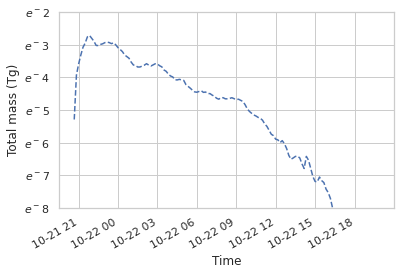

In [14]:
%autoreload
fig = plt.figure(4)
d1 = datetime.datetime(2020,10,21,20,0)
d2 = datetime.datetime(2020,10,22,0,20)
ax = fig.add_subplot(1,1,1)

volcplot.sub_plot_mass(ax)
fig.autofmt_xdate()
ax.set_ylim(np.e**(-8), np.e**(-2))

In [15]:
yval = volcplot.tmasslist
tval = volcplot.dlist
print(len(tval))
xval = np.arange(0,len(tval),1)/6.0
print(xval[-5:])
print(xval[0:5])

138
[22.16666667 22.33333333 22.5        22.66666667 22.83333333]
[0.         0.16666667 0.33333333 0.5        0.66666667]


In [16]:
%autoreload
k,A = volcplot.fit_exp_decay(xval[20:80],yval[20:80])

In [17]:
# half life. unit is hours.
half_life = -1/k * np.log(2)
print(half_life)

4.003342201528832


In [18]:
half_life/24.0

0.16680592506370132